<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [254]:
#vamos a importar las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import panel as pn
import plotly.graph_objects as go
import ipywidgets as widgets
import pandas as pd

Para realizar este análisis, se decidió utilizar tres bases del ICFES: 
1. Del año 2018 segundo periodo
2. Del año 2019 primer periodo
3. Del año 2019 segundo periodo

La información se obtuvo de la siguiente ruta:
https://www.icfes.gov.co/web/guest/investigadores-y-estudiantes-posgrado/acceso-a-bases-de-datos

In [255]:
#Vamos a importar las bases:
#Primero vamos a importar las bases de los :
df192 = pd.read_csv("Archivos\SB11_20192.txt",sep ="¬",engine = 'python', decimal=",")
df182 = pd.read_csv("Archivos\SB11_20182.txt",sep ="¬",engine = 'python', decimal=",")
df191= pd.read_csv("Archivos\SB11_20191.txt",sep ="¬",engine = 'python', decimal=",")


#Las vamos a unir, y esta será la base que vamos a trabajar:

df = df192.append(df182,ignore_index = True)
df = df.append(df191,ignore_index = True)

#Con la uninon de las bases, nos queda la siguiente base df, continiación se presentan las 5 primeras filas de la base:
df.head()


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,ESTU_LIMITA_MOTRIZ
0,TI,COLOMBIA,M,18/02/2002,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,NaN,...,67,A1,208,25.0,50.942156,2.0,2.0,PUBLICAR,NO,NaN
1,TI,COLOMBIA,F,24/01/2003,20194,SB11201940469859,ESTUDIANTE,No,COLOMBIA,NaN,...,89,A2,280,74.0,61.920976,3.0,3.0,PUBLICAR,NO,NaN
2,TI,COLOMBIA,M,28/06/2003,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,NaN,...,88,A2,299,83.0,59.767864,3.0,4.0,PUBLICAR,NO,NaN
3,TI,COLOMBIA,M,02/06/2001,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,NaN,...,89,A2,299,84.0,50.764238,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD,NaN
4,TI,COLOMBIA,M,26/04/2002,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,67,A1,309,88.0,45.779135,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD,NaN


In [256]:
#Para conocer el tamaño de la base, vamos a definir su dimensión:
tamaño = np.shape(df)
print("Nuestra base en total tiene "+ str(tamaño[0])+" filas y "+ str(tamaño[1])+" columnas, la composicion de ellas se puede ven en la celda anterior en donde se muestra el encabezado de la bas, adicionamente vamos a ver como se compone:")

Nuestra base en total tiene 1117229 filas y 83 columnas, la composicion de ellas se puede ven en la celda anterior en donde se muestra el encabezado de la bas, adicionamente vamos a ver como se compone:


A continuacion se presentan algunas estadísticas de las variables cuantitativas de la base:

In [257]:
df.describe()

,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,...,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
count,1.117229e+06,1.116699e+06,1.116699e+06,1.117229e+06,1.117229e+06,1.117229e+06,1.117229e+06,1.117229e+06,1.117229e+06,1.117229e+06,...,1.117229e+06,1.117229e+06,1.117229e+06,1.117229e+06,1.117189e+06,1.117229e+06,1.117229e+06,1.117210e+06,1.081111e+06,1.116604e+06
mean,2.018804e+04,4.470142e+01,3.285864e+04,1.793949e+05,2.063185e+11,2.068698e+11,3.288682e+04,3.265157e+01,3.281722e+04,3.260165e+01,...,2.066487e+00,4.734390e+01,5.019273e+01,1.968386e+00,4.971911e+01,5.012777e+01,2.491130e+02,5.001507e+01,5.028782e+01,2.386480e+00
std,5.957279e+00,1.099393e+03,2.651998e+04,2.139153e+05,9.380001e+10,9.450486e+10,2.649293e+04,2.646879e+01,2.654865e+04,2.652274e+01,...,7.643753e-01,1.209124e+01,2.890992e+01,8.288275e-01,1.234143e+01,2.891010e+01,5.132322e+01,2.896883e+01,9.893491e+00,6.848231e-01
min,2.018200e+04,5.000000e+00,5.001000e+03,1.800000e+01,1.050010e+11,1.050010e+11,5.001000e+03,5.000000e+00,5.001000e+03,5.000000e+00,...,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.253887e+01,1.000000e+00
25%,2.018200e+04,1.100000e+01,1.100100e+04,4.324000e+04,1.176140e+11,1.176530e+11,1.100100e+04,1.100000e+01,1.100100e+04,1.100000e+01,...,2.000000e+00,3.800000e+01,2.500000e+01,1.000000e+00,4.100000e+01,2.500000e+01,2.100000e+02,2.500000e+01,4.327903e+01,2.000000e+00
50%,2.019100e+04,2.000000e+01,2.044300e+04,1.082090e+05,1.760010e+11,1.760010e+11,2.062100e+04,2.000000e+01,2.022800e+04,2.000000e+01,...,2.000000e+00,4.600000e+01,5.000000e+01,2.000000e+00,4.900000e+01,5.000000e+01,2.460000e+02,5.000000e+01,4.988193e+01,2.000000e+00
75%,2.019400e+04,5.400000e+01,5.400100e+04,1.742920e+05,3.054400e+11,3.056150e+11,5.400100e+04,5.400000e+01,5.400100e+04,5.400000e+01,...,3.000000e+00,5.600000e+01,7.500000e+01,3.000000e+00,5.700000e+01,7.500000e+01,2.850000e+02,7.500000e+01,5.657356e+01,3.000000e+00
max,2.019400e+04,9.999900e+04,9.999900e+04,7.283030e+05,8.548740e+11,8.548740e+11,9.977300e+04,9.900000e+01,9.977300e+04,9.900000e+01,...,4.000000e+00,1.000000e+02,1.000000e+02,4.000000e+00,1.000000e+02,1.000000e+02,4.780000e+02,1.000000e+02,8.483637e+01,4.000000e+00


Para entender el significado de cada columna se utilizó el siguiente diccionario publicado en la página del ICFES:
https://www.icfes.gov.co/documents/20143/1885630/6.+Diccionario+Saber11+2019-1+a+2019-2.pdf


Se considera que para lograr encontrar relaciones improtantes sobre el resultado de la prueba Saber 11 las variables de interes son:
1. FAMI_ESTRATOVIVIENDA
2. FAMI_TIENECOMPUTADOR
3. PUNT_LECTURA_CRITICA
4. PUNT_MATEMATICAS
5. PUNT_C_NATURALES
6. PUNT_SOCIALES_CIUDADANAS
7. PUNT_INGLES
8. PUNT_GLOBAL
9. FAMI_TIENEINTERNET
10. COLE_AREA_UBICACION
11. ESTU_INSE_INDIVIDUAL
12. FAMI_NUMLIBROS
13. ESTU_DEDICACIONINTERNET
14. ESTU_HORASSEMANATRABAJA
15. ESTU_DEDICACIONLECTURADIARIA

In [258]:
#A continuación se genera una base nueva con las variables de interes:
df_modelo = df[['PUNT_GLOBAL',
                'FAMI_ESTRATOVIVIENDA',
                'FAMI_TIENECOMPUTADOR',
                'FAMI_TIENEINTERNET',
                'COLE_AREA_UBICACION',
                'ESTU_INSE_INDIVIDUAL',
                'FAMI_NUMLIBROS',
                'ESTU_DEDICACIONINTERNET',
                'ESTU_HORASSEMANATRABAJA',
                'ESTU_DEDICACIONLECTURADIARIA',
                'PUNT_LECTURA_CRITICA',
                'PUNT_MATEMATICAS',
                'PUNT_C_NATURALES',
                'PUNT_SOCIALES_CIUDADANAS',
                'PUNT_INGLES']]

#La variable ESTU_HORASSEMANATRABAJA, la vamos a utilizar para crear la variable ESTU_TRABAJA, en donde tendrá un valor de 1 en caso de que el estudiante trabaje, 0 del caso contrario.

def trabaja(row):
    result = 0
    if row["ESTU_HORASSEMANATRABAJA"] == "0":
        result = 0 
    else:
        result = 1    
    return result

df_modelo["ESTU_TRABAJA"] = df_modelo.apply(trabaja, axis=1)

#Vamos a elegir las columnas que se desean:
df_modelo = df_modelo[['PUNT_GLOBAL',
                'FAMI_ESTRATOVIVIENDA',
                'FAMI_TIENECOMPUTADOR',
                'FAMI_TIENEINTERNET',
                'COLE_AREA_UBICACION',
                'ESTU_INSE_INDIVIDUAL',
                'FAMI_NUMLIBROS',
                'ESTU_DEDICACIONINTERNET',
                'ESTU_TRABAJA',
                'ESTU_DEDICACIONLECTURADIARIA',
                'PUNT_LECTURA_CRITICA',
                'PUNT_MATEMATICAS',
                'PUNT_C_NATURALES',
                'PUNT_SOCIALES_CIUDADANAS',
                'PUNT_INGLES']]


<ipython-input-258-9704a6cd91c9>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Con eso, tenemos que la nueva base tendria la siguiente estructura:

A continuacion se muestran las 5 primeras filas de la base nueva

In [259]:
df_modelo.head()

,PUNT_GLOBAL,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,COLE_AREA_UBICACION,ESTU_INSE_INDIVIDUAL,FAMI_NUMLIBROS,ESTU_DEDICACIONINTERNET,ESTU_TRABAJA,ESTU_DEDICACIONLECTURADIARIA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,208,Estrato 3,No,Si,URBANO,50.942156,MÁS DE 100 LIBROS,Entre 30 y 60 minutos,1,Entre 30 y 60 minutos,47,48,37,30,54.0
1,280,NaN,Si,NaN,URBANO,61.920976,NaN,NaN,0,NaN,61,41,60,59,64.0
2,299,Estrato 3,Si,Si,URBANO,59.767864,MÁS DE 100 LIBROS,Entre 30 y 60 minutos,1,Entre 30 y 60 minutos,60,65,54,59,63.0
3,299,Estrato 1,No,No,URBANO,50.764238,26 A 100 LIBROS,Más de 3 horas,0,Entre 30 y 60 minutos,66,57,41,74,64.0
4,309,Estrato 3,Si,No,URBANO,45.779135,11 A 25 LIBROS,Entre 30 y 60 minutos,1,30 minutos o menos,62,54,61,73,53.0


In [260]:
#Se realizarán algunas validaciones de la base de interés:
tamaño = np.shape(df_modelo)
filas=tamaño[0] 
columnas = tamaño[1]
print('La nueva base contiene '+ str(filas) + ' filas y '+str(columnas) +' columnas.'  )

La nueva base contiene 1117229 filas y 15 columnas.


A continuación se presenta la cantidad de datos faltantes que cada variable presenta:

In [261]:
print(df_modelo.isnull().sum())

PUNT_GLOBAL                         0
FAMI_ESTRATOVIVIENDA            75199
FAMI_TIENECOMPUTADOR            37288
FAMI_TIENEINTERNET              68157
COLE_AREA_UBICACION                 0
ESTU_INSE_INDIVIDUAL            36118
FAMI_NUMLIBROS                  96219
ESTU_DEDICACIONINTERNET         72242
ESTU_TRABAJA                        0
ESTU_DEDICACIONLECTURADIARIA    69711
PUNT_LECTURA_CRITICA                0
PUNT_MATEMATICAS                    0
PUNT_C_NATURALES                    0
PUNT_SOCIALES_CIUDADANAS            0
PUNT_INGLES                        40
dtype: int64


In [262]:
cant_datos_faltantes = (sum(df_modelo.isnull().sum().values)/(filas*columnas))*100
cant_datos_faltantes

2.714895513811403

In [263]:
print('Dado que estos faltantes representan el '+str(cant_datos_faltantes)+'% de toda la base, esto podria afectar el resultado sobre la relacion de cada una de estas variables sobre el resultado obtenido en las pruebas Saber 11, por lo que vamos a realizar una imputación de la base de datos:') 

Dado que estos faltantes representan el 2.714895513811403% de toda la base, esto podria afectar el resultado sobre la relacion de cada una de estas variables sobre el resultado obtenido en las pruebas Saber 11, por lo que vamos a realizar una imputación de la base de datos:


La imputacion que se va a realizar es por el metodo drop, dado que solo el 2.71% de la base contiene datos faltantes,
no se considera que se deba "llenar" los campos, por lo que vamos a eliminar las filas.


In [264]:
df_modelo_na = df_modelo.dropna(how = "any")
df_modelo_na.head()

,PUNT_GLOBAL,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,COLE_AREA_UBICACION,ESTU_INSE_INDIVIDUAL,FAMI_NUMLIBROS,ESTU_DEDICACIONINTERNET,ESTU_TRABAJA,ESTU_DEDICACIONLECTURADIARIA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,208,Estrato 3,No,Si,URBANO,50.942156,MÁS DE 100 LIBROS,Entre 30 y 60 minutos,1,Entre 30 y 60 minutos,47,48,37,30,54.0
2,299,Estrato 3,Si,Si,URBANO,59.767864,MÁS DE 100 LIBROS,Entre 30 y 60 minutos,1,Entre 30 y 60 minutos,60,65,54,59,63.0
3,299,Estrato 1,No,No,URBANO,50.764238,26 A 100 LIBROS,Más de 3 horas,0,Entre 30 y 60 minutos,66,57,41,74,64.0
4,309,Estrato 3,Si,No,URBANO,45.779135,11 A 25 LIBROS,Entre 30 y 60 minutos,1,30 minutos o menos,62,54,61,73,53.0
6,288,Estrato 3,Si,Si,URBANO,52.910946,26 A 100 LIBROS,Más de 3 horas,1,No leo por entretenimiento,63,57,55,57,52.0


Dado el procedimiento realizado anteriormente, podemos comprobar que no existen valores faltantes en la base de datos:

In [265]:
print(df_modelo_na.isnull().sum())

PUNT_GLOBAL                     0
FAMI_ESTRATOVIVIENDA            0
FAMI_TIENECOMPUTADOR            0
FAMI_TIENEINTERNET              0
COLE_AREA_UBICACION             0
ESTU_INSE_INDIVIDUAL            0
FAMI_NUMLIBROS                  0
ESTU_DEDICACIONINTERNET         0
ESTU_TRABAJA                    0
ESTU_DEDICACIONLECTURADIARIA    0
PUNT_LECTURA_CRITICA            0
PUNT_MATEMATICAS                0
PUNT_C_NATURALES                0
PUNT_SOCIALES_CIUDADANAS        0
PUNT_INGLES                     0
dtype: int64


Con esto, nos queda que la nueva base de datos tiene las siguientes dimensiones:

In [266]:
tamaño = np.shape(df_modelo_na)
filas=tamaño[0] 
columnas = tamaño[1]
print('La nueva base contiene '+ str(filas) + ' filas y '+str(columnas) +' columnas.'  )

La nueva base contiene 988394 filas y 15 columnas.


# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

In [267]:
#Vamos a realizar una nuevva base con el df final del punto anterior:
df2=df_modelo_na

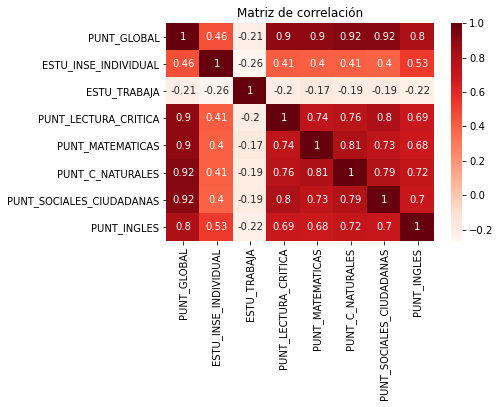

In [268]:
#Vamos a realizar un mapa con las relaciones de las variables numéricas de la base anterior, con el fin de conocer su utilidad para 
#realizar un modelo con las mismas, en donde la variable dependiente es la variable 'Puntaje global'
sns.heatmap(df2.corr(), cmap='Reds', annot=True)
plt.title('Matriz de correlación');

En el mapa de correlación, se observa una relacion del puntaje global con "Estu_inse_individual"

C:\Users\laura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

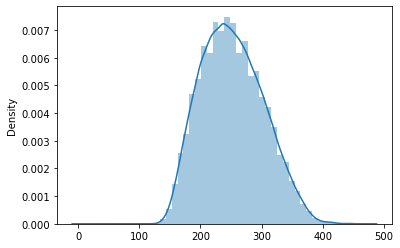

In [269]:
#Vamos a graficar el comportamiento de la variable del resultado del icfes, para ver si su comportamiento se asemeja a 
#distribucion normal:

sns.distplot(df2[['PUNT_GLOBAL']])


Dada la grafica anterior, observa que el puntaje sigue una distribución normal.

Vamos a graficar la relacion de cada una de las variables en un pairplot para ver la relacion que hay entre cada una de 
las variables y su distribucion:

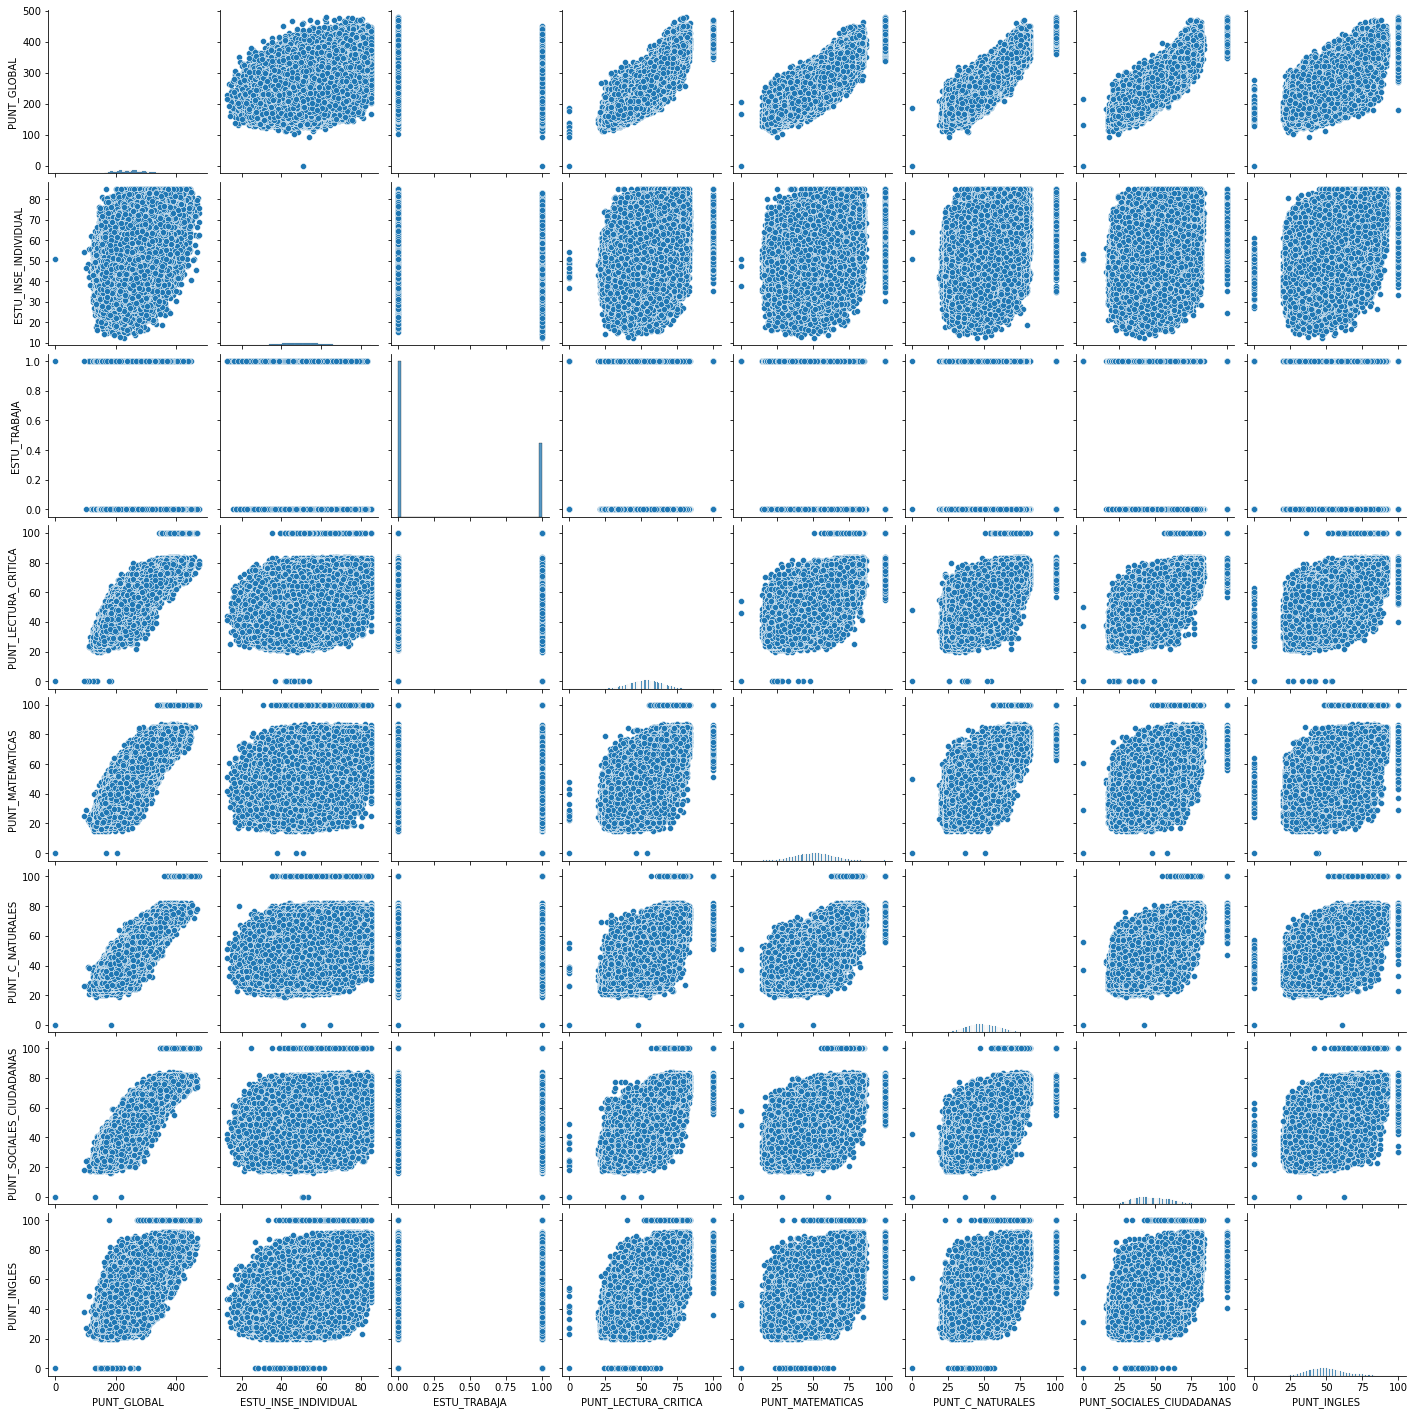

In [270]:
sns.pairplot(df2)

Por supuesto que se ve una gran relación entre los puntajes de cada prueba y el puntaje final, dado que el puntaje final
es una variable generada a partir de estas variables.


_Estrato:_

<AxesSubplot:xlabel='FAMI_ESTRATOVIVIENDA', ylabel='PUNT_GLOBAL'>

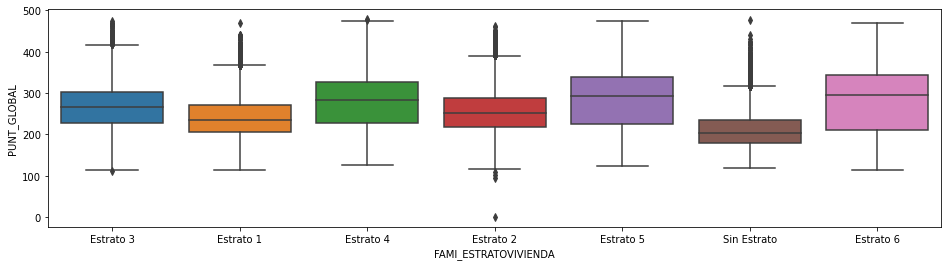

In [271]:
#Para ver el comportamiento del puntaje sengun el estrato realizamos el siguiente gráfico:
plt.figure(figsize=(16,4))
sns.boxplot( y=df2["PUNT_GLOBAL"], x=df2["FAMI_ESTRATOVIVIENDA"] )

Se observa como el estrato si influye en el puntaje global de un estudiante en as pruebas Saber 11

_FAMI_TIENECOMPUTADOR:_

<AxesSubplot:xlabel='FAMI_TIENECOMPUTADOR', ylabel='PUNT_GLOBAL'>

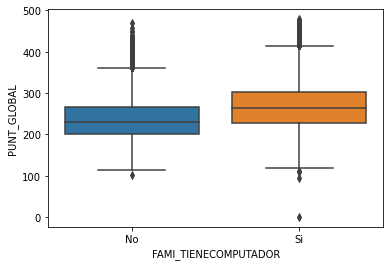

In [272]:
#Para ver el comportamiento si la familia tiene computador,se realiza un grafico d cajas:
sns.boxplot( y=df2["PUNT_GLOBAL"], x=df2["FAMI_TIENECOMPUTADOR"] )

Se observa que los estudiantes que cuentan con un computador en casa, presentan mejor resultado en la prueba del icfes

FAMI_TIENEINTERNET

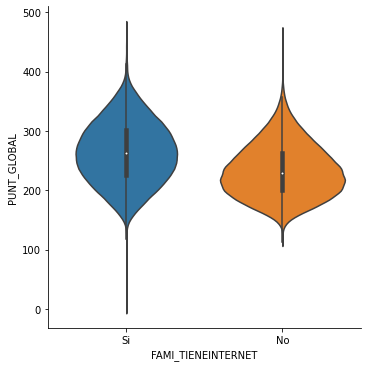

In [273]:
sns.catplot(x = "FAMI_TIENEINTERNET", y = "PUNT_GLOBAL", data = df2, kind = "violin")

Se oberva que los clientes que si tienen internet mejoran su rendimiento en la prueba saber 11.

_COLE_AREA_UBICACION_

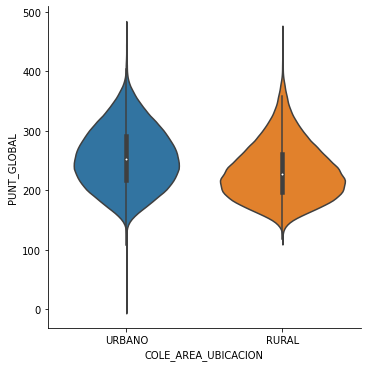

In [274]:
sns.catplot(x = "COLE_AREA_UBICACION", y = "PUNT_GLOBAL", data = df2, kind = "violin")

Se ve que los estudiantes que viven en zonas rurales de Colombia presentan menor promedio en el resultado del puntaje global de la prueba saber 11.

_FAMI_NUMLIBROS_

<AxesSubplot:xlabel='FAMI_NUMLIBROS', ylabel='PUNT_GLOBAL'>

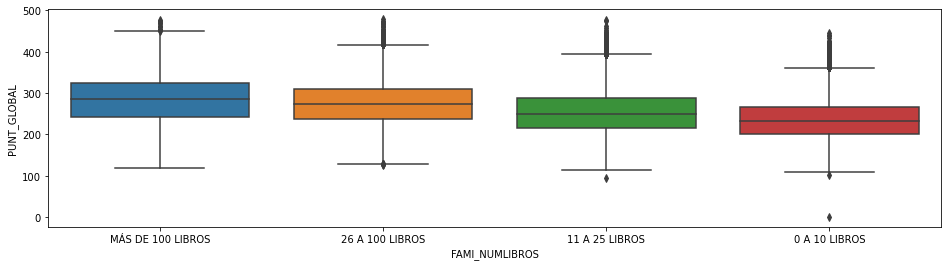

In [275]:
plt.figure(figsize=(16,4))
sns.boxplot( y=df2["PUNT_GLOBAL"], x=df2["FAMI_NUMLIBROS"] )

No se ve relacion en la cantidad de libros que lee el estudiante con respecto al resultado de las pruebas Saber 11.

_ESTU_DEDICACIONINTERNET_


<AxesSubplot:xlabel='ESTU_DEDICACIONINTERNET', ylabel='PUNT_GLOBAL'>

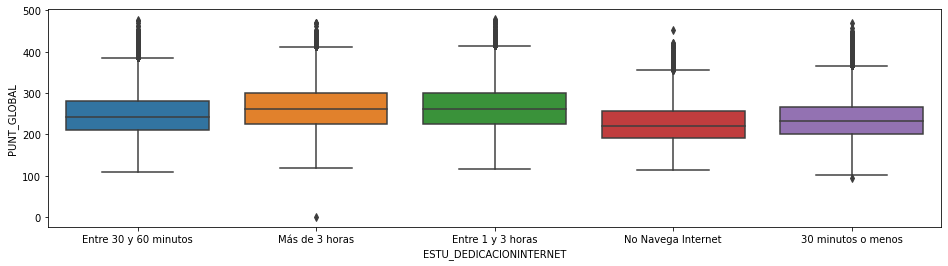

In [276]:
plt.figure(figsize=(16,4))
sns.boxplot( y=df2["PUNT_GLOBAL"], x=df2["ESTU_DEDICACIONINTERNET"] )

Si se ve una ligera relación entre las horas que el estudiante dedica en internet al dia

_ESTU_TRABAJA_

<AxesSubplot:xlabel='ESTU_TRABAJA', ylabel='PUNT_GLOBAL'>

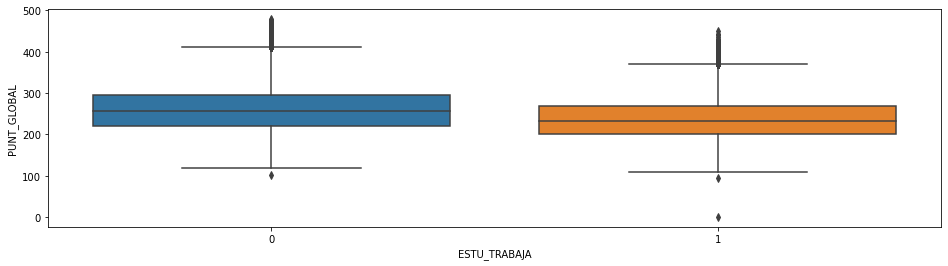

In [277]:
plt.figure(figsize=(16,4))
sns.boxplot( y=df2["PUNT_GLOBAL"], x=df2["ESTU_TRABAJA"] )

No se ve gran relacion en los resultados primedio de si el estudiante trabaja o no

_ESTU_DEDICACIONLECTURADIARIA_

<AxesSubplot:xlabel='ESTU_DEDICACIONLECTURADIARIA', ylabel='PUNT_GLOBAL'>

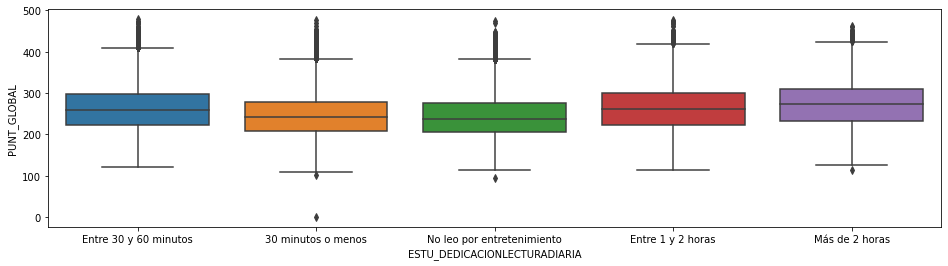

In [278]:
plt.figure(figsize=(16,4))
sns.boxplot( y=df2["PUNT_GLOBAL"], x=df2["ESTU_DEDICACIONLECTURADIARIA"] )

No se ve relacion entre el tiempo que el estudiante dedica a la lectura en un dia y la media de su resultado en las pruebas saber 11

Con las anteriores conclusiones de cada relación, tenemos que el nuevo dataframe es:

In [361]:
df2_final = df_modelo_na[['FAMI_ESTRATOVIVIENDA',
                          'FAMI_TIENEINTERNET',
                          'COLE_AREA_UBICACION',
                          'FAMI_TIENECOMPUTADOR',
                          'ESTU_DEDICACIONINTERNET',
                          'ESTU_INSE_INDIVIDUAL',
                          'PUNT_GLOBAL'
                         ]]

df2_final.head()

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,COLE_AREA_UBICACION,FAMI_TIENECOMPUTADOR,ESTU_DEDICACIONINTERNET,ESTU_INSE_INDIVIDUAL,PUNT_GLOBAL
0,Estrato 3,Si,URBANO,No,Entre 30 y 60 minutos,50.942156,208
2,Estrato 3,Si,URBANO,Si,Entre 30 y 60 minutos,59.767864,299
3,Estrato 1,No,URBANO,No,Más de 3 horas,50.764238,299
4,Estrato 3,No,URBANO,Si,Entre 30 y 60 minutos,45.779135,309
6,Estrato 3,Si,URBANO,Si,Más de 3 horas,52.910946,288


# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

Dado los resultados previos, se decide utilizar las variables:
1. FAMI_ESTRATOVIVIENDA
2. FAMI_TIENEINTERNET
3. COLE_AREA_UBICACION
4. FAMI_TIENECOMPUTADOR
5. ESTU_DEDICACIONINTERNET
6. ESTU_INSE_INDIVIDUAL
7. PUNT_GLOBAL

Para proponer modelos que expliquen el desempeño de los estudiantes en la prueba Saber 11.

In [362]:
#Generamos en fataframe de esta mision:
df3 = df2

In [363]:
#Para definir si el estudiante esta en riesgo o no, vamos a elegir el percentil:
alpha = 90

In [364]:
#Crearemos una nueva columna llamada "Results" en donde se defina si el estudiante esta en riesgo no no
percentile_lectura  =  np.percentile(df3['PUNT_LECTURA_CRITICA'], alpha)
percentile_mate  =  np.percentile(df3['PUNT_MATEMATICAS'], alpha)
percentile_natu  =  np.percentile(df3['PUNT_C_NATURALES'], alpha)
percentile_soci  =  np.percentile(df3['PUNT_SOCIALES_CIUDADANAS'], alpha)
percentile_ing  =  np.percentile(df3['PUNT_INGLES'], alpha)


def pass_or_fail(row):
    re = ""
    result = 0
    if row["PUNT_LECTURA_CRITICA"] > percentile_lectura:
        result = result +1 
    if row["PUNT_MATEMATICAS"] > percentile_mate:
        result = result +1
    if row["PUNT_C_NATURALES"] > percentile_natu:
        result = result +1
    if row["PUNT_INGLES"] > percentile_ing:
        result = result +1
    if row["PUNT_SOCIALES_CIUDADANAS"] > percentile_soci:
        result = result +1
    
    if result > 3:
        re = "En riesgo"
    else:
        re= "No en riesgo"
    return re

df3["Results"] = df3.apply(pass_or_fail, axis=1)


<ipython-input-364-25ac1dac0c88>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Teninendo en cuenta la creacion de la columna 'Results',  procedemos a utilizar las columnas seleccionadas en la misión anterior:

In [365]:
#Por lo tanto, el dataframe del modelo nos queda de la siguiente manera:

df3_modelo =df3[['FAMI_ESTRATOVIVIENDA',
                 'FAMI_TIENEINTERNET',
                'COLE_AREA_UBICACION',
                'FAMI_TIENECOMPUTADOR',
                'ESTU_DEDICACIONINTERNET',
                'ESTU_INSE_INDIVIDUAL',
                'Results'
                         ]]
               

df3_modelo.head()

#para posteriores ejercicios vamos a hguardar esta base como df4


Para poder realizar el modelo de regresión logistica, se realizan variables dummies y las agregamos al modelo:

In [366]:
def estrato(row):
    result = 0
    if row['FAMI_ESTRATOVIVIENDA'] == "Estrato 1":
        result = 1 
    elif row["FAMI_ESTRATOVIVIENDA"] == "Estrato 2":
        result = 2
    elif row["FAMI_ESTRATOVIVIENDA"] == "Estrato 3":
        result = 3
    elif row["FAMI_ESTRATOVIVIENDA"] == "Estrato 4":
        result = 4 
    elif row["FAMI_ESTRATOVIVIENDA"] == "Estrato 5":
        result = 5 
    elif row["FAMI_ESTRATOVIVIENDA"] == "Estrato 6":
        result = 6
    else:
        result = 0       
        
    return result

def internet(row):
    result = 0
    if row['FAMI_TIENEINTERNET'] == "Si":
        result = 1 
    else:
        result = 0       
        
    return result

def ubicacion(row):
    result = 0
    if row['COLE_AREA_UBICACION'] == "URBANO":
        result = 1 
    else:
        result = 0       
        
    return result

def computador(row):
    result = 0
    if row['FAMI_TIENECOMPUTADOR'] == "Si":
        result = 1 
    else:
        result = 0       
        
    return result

def ded_internet(row):
    result = 0
    if row['ESTU_DEDICACIONINTERNET'] == 'Entre 30 y 60 minutos':
        result = 1 
    elif row["ESTU_DEDICACIONINTERNET"] == 'Más de 3 horas':
        result = 2
    elif row["ESTU_DEDICACIONINTERNET"] == 'Entre 1 y 3 horas':
        result = 3
    elif row["ESTU_DEDICACIONINTERNET"] == 'No Navega Internet':
        result = 4 
    elif row["ESTU_DEDICACIONINTERNET"] == '30 minutos o menos':
        result = 5 
    else:
        result = 0       
        
    return result

df3_modelo["FAMI_ESTRATOVIVIENDA"] = df3_modelo.apply(estrato, axis=1)
df3_modelo["FAMI_TIENEINTERNET"] = df3_modelo.apply(internet, axis=1)
df3_modelo["COLE_AREA_UBICACION"] = df3_modelo.apply(ubicacion, axis=1)
df3_modelo["FAMI_TIENECOMPUTADOR"] = df3_modelo.apply(computador, axis=1)
df3_modelo["ESTU_DEDICACIONINTERNET"] = df3_modelo.apply(ded_internet, axis=1)



<ipython-input-366-815a5c0992b0>:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-366-815a5c0992b0>:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-366-815a5c0992b0>:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-366-

In [367]:
df3_modelo.head()

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,COLE_AREA_UBICACION,FAMI_TIENECOMPUTADOR,ESTU_DEDICACIONINTERNET,ESTU_INSE_INDIVIDUAL,Results
0,3,1,1,0,1,50.942156,No en riesgo
2,3,1,1,1,1,59.767864,No en riesgo
3,1,0,1,0,2,50.764238,No en riesgo
4,3,0,1,1,1,45.779135,No en riesgo
6,3,1,1,1,2,52.910946,No en riesgo


A continuación prodecemos a realizar el modelo de REGRESION LOGISTICA que nos permite predecir si el estudiante se va a encontrar en la categoria "En riesgo" o no:


In [368]:
# Definimos todas las variables como variables independientes
X = df3_modelo.drop('Results', axis = 1)

# Definimos la variable de respuesta
y = df3_modelo[["Results"]]

# Creamos conjuntos de datos para entrenamiento y prueba
#vamos a utilizar como test el 30% de la base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Declaramos una instancia del modelo
lr = LogisticRegression()


# Entrenamos el modelo
lr.fit(X_train, y_train)


# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

#Verificamos la presicion del modelo
PRE =lr.score(X_test, y_test)
print(str(lr.score(X_test, y_test)))
print('Como la presicion del modelo es del '+ str(PRE)+' , podemos decir que las variables seleccionadas si explican razonablemente bien el desempeño de los estudiantes en la prueba')

C:\Users\laura\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9507249113884776
Como la presicion del modelo es del 0.9507249113884776 , podemos decir que las variables seleccionadas si explican razonablemente bien el desempeño de los estudiantes en la prueba


# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Dado los análisis realizados anteriormente, una de las preguntas que se podria hacer el usuario es:
Debido a que las variables 'cole_valor_pension', 'fami_estrato_vivienda','fami_nivel_sisben','fami_computador',
'fami_ing_fmiliar_mensual' son variables que pueden predecir el comportamiento del resultado de la prueba Saber 11, 
¿Cual es la distribución de los estudiantes que realizaron la prueba en los periodos 2009 segundo periodo y 
del año 2008 segundo periodo?, ¿se concentran en las agrupaciones en donde se presentan mejores resultados?

#¿Como se distribuye la cantidad de estudiantes en colombia que presentaron el examen del icfes en los periodos xxxxxxx por las siguientes variables?
'cole_valor_pension',
                'fami_estrato_vivienda',
                'fami_nivel_sisben' ,
                'fami_computador',
                'fami_ing_fmiliar_mensual',
                 'Results'
                    
    #Cual es el % de variables que esta em resgo o no?

In [438]:
df4 = df3[['FAMI_ESTRATOVIVIENDA',
                 'FAMI_TIENEINTERNET',
                'COLE_AREA_UBICACION',
                'FAMI_TIENECOMPUTADOR',
                'ESTU_DEDICACIONINTERNET',
                'ESTU_INSE_INDIVIDUAL',
                'Results']]

Declaramos la barra deslizante para la variable ESTU_INSE_INDIVIDUAL y las listas desplegables para las variables categóricas. En primer lugar, declaramos la barra deslizante que hace referencia al ESTU_INSE_INDIVIDUAL

In [439]:
nivel_sis = widgets.IntSlider(min = 11, max = 85, step = 1.0)

En segundo lugar, declaramos la lista desplegable de FAMI_ESTRATOVIVIENDA.

In [440]:
lista_estrato = widgets.Dropdown(
                        description = 'FAMI_ESTRATOVIVIENDA:',
                        options = df4['FAMI_ESTRATOVIVIENDA'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )

En tercer lugar, declaramos la lista desplegable de FAMI_TIENEINTERNET. y de las demás variables categóricas de la base df4

In [441]:
lista_internet = widgets.Dropdown(
                            description = 'FAMI_TIENEINTERNET:',
                            options = df4['FAMI_TIENEINTERNET'].unique().tolist(),
                            style = {'description_width': 'initial'}                    # Mostrar el nombre completo.
                         )

lista_ubicacion = widgets.Dropdown(
                            description = 'COLE_AREA_UBICACION:',
                            options = df4['COLE_AREA_UBICACION'].unique().tolist(),
                            style = {'description_width': 'initial'}                    # Mostrar el nombre completo.
                         )
lista_computador = widgets.Dropdown(
                            description = 'FAMI_TIENECOMPUTADOR:',
                            options = df4['FAMI_TIENECOMPUTADOR'].unique().tolist(),
                            style = {'description_width': 'initial'}                    # Mostrar el nombre completo.
                         )
lista_dedicainternet = widgets.Dropdown(
                            description = 'ESTU_DEDICACIONINTERNET:',
                            options = df4['ESTU_DEDICACIONINTERNET'].unique().tolist(),
                            style = {'description_width': 'initial'}                    # Mostrar el nombre completo.
                         )

Declaramos la figura y sus componentes. Como es una figura interactiva, utilizamos el método FigureWidget del módulo plotly.graph_objects.

In [442]:
fig = go.FigureWidget(
                        data = go.Histogram(name = 'Results'),  
    
                        layout = go.Layout(
                                            title = 'Estudiantes en riesgo',
                                            xaxis_title = 'Estudiante en riesgo',
                                            yaxis_title = 'Cantidad de estudiantes',
                                          )
                     )

Luego, le agregamos funcionalidad e interactividad al gráfico. En primer lugar, definimos la función filtrar que filtre los datos de acuerdo con lo seleccionado por el usuario.

In [463]:
def filtrar():
    filtrar_lista = [i and j and k and h and l and o for i, j, k,h,l,o in zip(
                                                        df4['ESTU_INSE_INDIVIDUAL'] >= nivel_sis.value, 
                                                        df4['FAMI_ESTRATOVIVIENDA'] == lista_estrato.value,
                                                        df4['FAMI_TIENEINTERNET'] == lista_internet.value,
                                                        df4['COLE_AREA_UBICACION'] == lista_ubicacion.value,
                                                        df4['FAMI_TIENECOMPUTADOR'] == lista_computador.value,
                                                        df4['ESTU_DEDICACIONINTERNET'] == lista_dedicainternet.value
                                                     )
                    ]
    
    df_temporal = df4[filtrar_lista]
    fig.data[0].x = df_temporal['Results'] # Establecemos los datos en el eje x.

En segundo lugar, definimos una función que guarda los cambios en el gráfico.

In [464]:
def respuesta(change):
    filtrar()

Posteriormente, vinculamos los controles con la función de `respuesta`.

In [465]:
nivel_sis.observe(respuesta, names = 'value')
lista_estrato.observe(respuesta, names = 'value')
lista_internet.observe(respuesta, names = 'value')
lista_ubicacion.observe(respuesta, names = 'value')
lista_computador.observe(respuesta, names = 'value')
lista_dedicainternet.observe(respuesta, names = 'value')

In [466]:
filtrar()

Definimos los componentes de la parte superior del gráfico. Utilizamos las funciones `HBox` y `Label` de `ipywidgets` para definir estos componentes.

In [467]:
parte_superior = widgets.HBox([widgets.Label('ESTU_INSE_INDIVIDUAL:'), nivel_sis])

Definimos los componentes de la parte inferior del gráfico. 

In [468]:
parte_inferior = widgets.HBox([lista_estrato, lista_internet,lista_ubicacion,lista_computador,lista_dedicainternet])

In [469]:
visualizacion = widgets.VBox(
              [parte_superior,
              parte_inferior,
              fig]
            )

In [470]:
display(visualizacion)